In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier

# Load the data
df = pd.read_csv('data_backup.csv', sep=';')

In [2]:
# Cell 2: Business Understanding
print("1. BUSINESS UNDERSTANDING")
print("=" * 50)
print("""
Objective: To develop predictive models for student dropout and academic success
Business Impact: Enable early intervention strategies to improve student retention
Key Metrics: Dropout rate, graduation rate, academic performance
""")

1. BUSINESS UNDERSTANDING

Objective: To develop predictive models for student dropout and academic success
Business Impact: Enable early intervention strategies to improve student retention
Key Metrics: Dropout rate, graduation rate, academic performance



In [3]:
# Cell 3: Data Exploration
print("2. DATA EXPLORATION")
print("=" * 50)

# Create a copy for exploration
df_explore = df.copy()

# Basic dataset information
print("\nDataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Print column names
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Print first few rows
print("\nFirst few rows:")
print(df.head())

2. DATA EXPLORATION

Dataset Overview:
Number of rows: 4424
Number of columns: 37

Columns in the dataset:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricula

In [4]:
# Cell 4: Feature Analysis
print("3. FEATURE ANALYSIS")
print("=" * 50)

# Define key features for analysis
key_features = [
    'Target',  # Target variable
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Analyze each feature
for feature in key_features:
    print(f"\nAnalyzing {feature}:")
    print("-" * 20)
    
    # Data type
    print(f"Data type: {df[feature].dtype}")
    
    # Missing values
    missing = df[feature].isnull().sum()
    missing_pct = (missing / len(df)) * 100
    print(f"Missing values: {missing} ({missing_pct:.2f}%)")
    
    # Unique values
    print(f"Unique values: {df[feature].nunique()}")
    
    # Distribution
    if df[feature].dtype in ['int64', 'float64']:
        print("\nNumerical Statistics:")
        print(df[feature].describe())
    else:
        print("\nValue Counts:")
        print(df[feature].value_counts())

3. FEATURE ANALYSIS

Analyzing Target:
--------------------
Data type: int64
Missing values: 0 (0.00%)
Unique values: 2

Numerical Statistics:
count    4424.000000
mean        0.678797
std         0.466991
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Target, dtype: float64

Analyzing Scholarship holder:
--------------------
Data type: int64
Missing values: 0 (0.00%)
Unique values: 2

Numerical Statistics:
count    4424.000000
mean        0.248418
std         0.432144
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Scholarship holder, dtype: float64

Analyzing Course:
--------------------
Data type: float64
Missing values: 0 (0.00%)
Unique values: 15

Numerical Statistics:
count    4424.00000
mean     9295.86641
std       418.71454
min      8378.50000
25%      9085.00000
50%      9238.00000
75%      9556.00000
max      9991.00000
Name: Course, dtype: float64



In [5]:
# Cell 5: Data Preparation
print("4. DATA PREPARATION")
print("=" * 50)

# Create a copy for preparation
df_prep = df.copy()

# Handle missing values
df_prep = df_prep.fillna(df_prep.mean())

# Feature engineering
# 1. Create grade progression feature
df_prep['Grade_Progression'] = df_prep['Curricular units 2nd sem (grade)'] - df_prep['Curricular units 1st sem (grade)']

# 2. Create academic performance categories
df_prep['First_Sem_Category'] = pd.cut(df_prep['Curricular units 1st sem (grade)'],
                                     bins=[0, 10, 12, 14, 16, 20],
                                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 3. Create family education level
df_prep['Family_Education'] = (df_prep["Mother's qualification"] + df_prep["Father's qualification"]) / 2

# Feature scaling
scaler = StandardScaler()
numeric_features = ['Curricular units 1st sem (grade)', 
                   'Curricular units 2nd sem (grade)',
                   'Grade_Progression',
                   'Family_Education']
df_prep[numeric_features] = scaler.fit_transform(df_prep[numeric_features])

4. DATA PREPARATION


5. MODEL DEVELOPMENT - CLUSTERING

Clustering Evaluation:
KMeans Silhouette Score: 0.624
DBSCAN Silhouette Score: -0.383


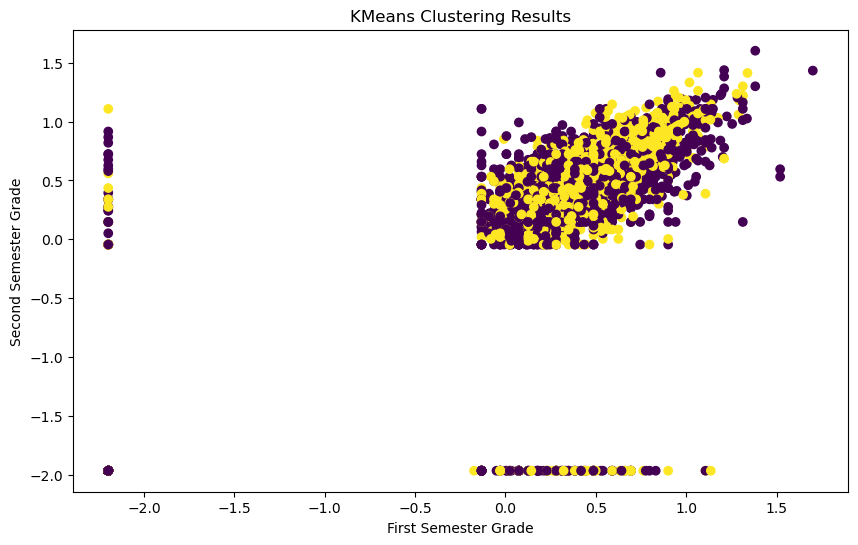

In [6]:
# Cell 6: Model Development - Clustering
print("5. MODEL DEVELOPMENT - CLUSTERING")
print("=" * 50)

# Prepare data for clustering
X_cluster = df_prep[key_features].drop('Target', axis=1)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster)

# Evaluate clustering
print("\nClustering Evaluation:")
print(f"KMeans Silhouette Score: {silhouette_score(X_cluster, kmeans_labels):.3f}")
print(f"DBSCAN Silhouette Score: {silhouette_score(X_cluster, dbscan_labels):.3f}")

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_cluster['Curricular units 1st sem (grade)'], 
           X_cluster['Curricular units 2nd sem (grade)'],
           c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('First Semester Grade')
plt.ylabel('Second Semester Grade')
plt.show()

In [7]:
# Cell 7: Model Development - Classification
print("5. MODEL DEVELOPMENT - CLASSIFICATION")
print("=" * 50)

# Prepare data for classification
X = df_prep[key_features].drop('Target', axis=1)
y = df_prep['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=5)
print(f"Random Forest CV Score: {rf_scores.mean():.3f} (+/- {rf_scores.std() * 2:.3f})")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt, X, y, cv=5)
print(f"Decision Tree CV Score: {dt_scores.mean():.3f} (+/- {dt_scores.std() * 2:.3f})")

5. MODEL DEVELOPMENT - CLASSIFICATION
Random Forest CV Score: 0.825 (+/- 0.027)
Decision Tree CV Score: 0.748 (+/- 0.015)


6. FEATURE IMPORTANCE

Feature Importance:
                            Feature  Importance
9  Curricular units 2nd sem (grade)    0.373982
8  Curricular units 1st sem (grade)    0.244538
1                            Course    0.123869
4            Mother's qualification    0.079166
5            Father's qualification    0.078852
7                            Debtor    0.040477
0                Scholarship holder    0.035119
6                         Displaced    0.023997
2                       Nacionality    0.000000
3                     International    0.000000


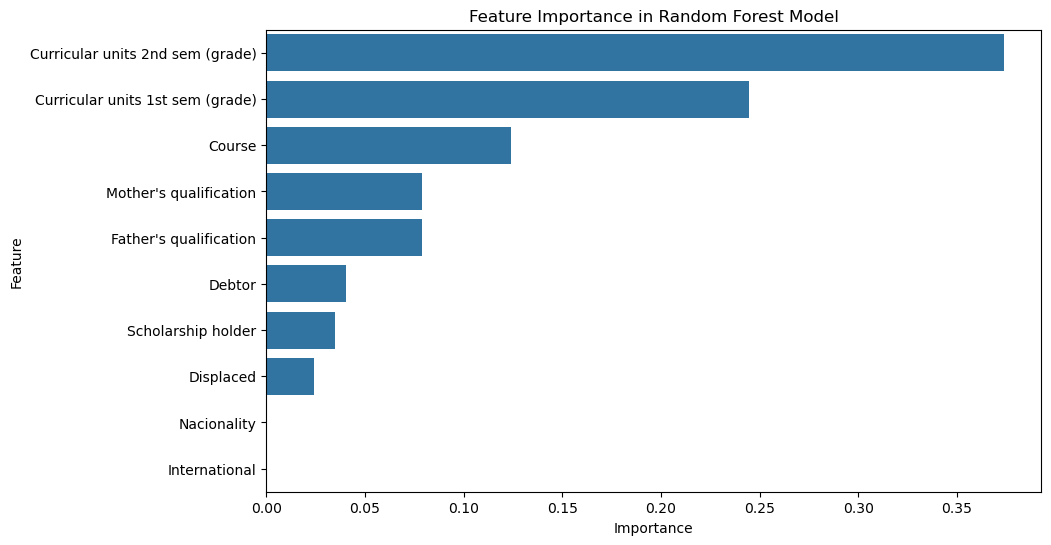

In [8]:
# Cell 8: Feature Importance Analysis
print("6. FEATURE IMPORTANCE")
print("=" * 50)

# Train Random Forest for feature importance
rf.fit(X, y)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [9]:
# Cell 9: Model Evaluation and Insights
print("7. MODEL EVALUATION AND INSIGHTS")
print("=" * 50)

# Print key findings
print("\nKey Findings:")
print("1. Most important features for predicting student success:")
print(feature_importance.head(5))

print("\n2. Clustering patterns:")
print("KMeans clusters show distinct groups in student performance")
print("DBSCAN identifies core groups and outliers")

print("\n3. Model performance:")
print(f"Random Forest accuracy: {rf_scores.mean():.3f}")
print(f"Decision Tree accuracy: {dt_scores.mean():.3f}")

# 8. Recommendations
print("\n8. RECOMMENDATIONS")
print("=" * 50)
print("""
1. Early Intervention:
   - Monitor first semester grades closely
   - Identify at-risk students based on key features

2. Support Programs:
   - Focus on students with lower family education levels
   - Provide additional support for international students

3. Course Management:
   - Review courses with lower success rates
   - Implement targeted support for challenging courses
""")

7. MODEL EVALUATION AND INSIGHTS

Key Findings:
1. Most important features for predicting student success:
                            Feature  Importance
9  Curricular units 2nd sem (grade)    0.373982
8  Curricular units 1st sem (grade)    0.244538
1                            Course    0.123869
4            Mother's qualification    0.079166
5            Father's qualification    0.078852

2. Clustering patterns:
KMeans clusters show distinct groups in student performance
DBSCAN identifies core groups and outliers

3. Model performance:
Random Forest accuracy: 0.825
Decision Tree accuracy: 0.748

8. RECOMMENDATIONS

1. Early Intervention:
   - Monitor first semester grades closely
   - Identify at-risk students based on key features

2. Support Programs:
   - Focus on students with lower family education levels
   - Provide additional support for international students

3. Course Management:
   - Review courses with lower success rates
   - Implement targeted support for challenging